In [3]:
#Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Importing the Dataset

advertising = pd.read_csv("advertising.csv")

In [6]:
advertising

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
#Peeking the Data

advertising.shape

(200, 5)

In [8]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


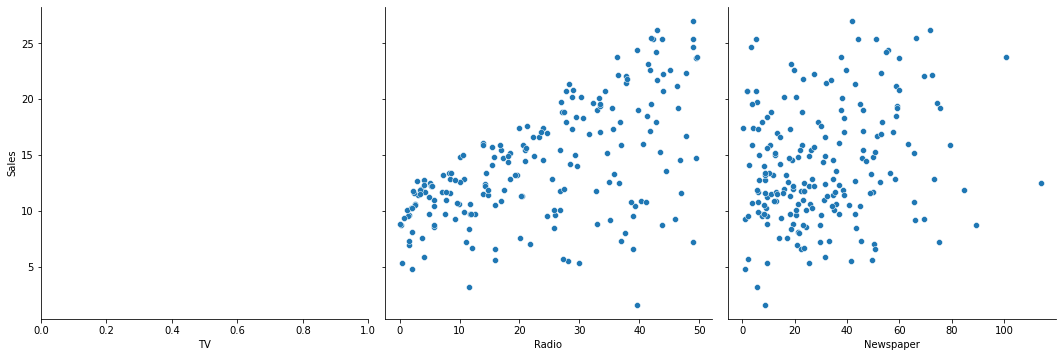

In [10]:
#Visualisation

sns.pairplot(advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 5, kind = 'scatter')

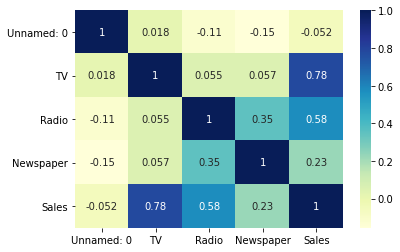

In [11]:
sns.heatmap(advertising.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [12]:
X = advertising['TV']
y = advertising['Sales']

In [50]:
#Splitting the data into Train and Test (with split ratio = 80-20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [51]:
X_train

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 140, dtype: float64

In [52]:
X_test.head()

119     19.4
77     120.5
148     38.0
149     44.7
154    187.8
Name: TV, dtype: float64

In [53]:
import statsmodels.api as sm

In [54]:
#Adding a constant (to get an intercept)
X_train_sm = sm.add_constant(X_train)

In [55]:
#Fitting the regression model using OLS (of SM)

lr = sm.OLS(y_train, X_train_sm).fit()

In [56]:
lr.params

const    6.745302
TV       0.050244
dtype: float64

In [57]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           1.64e-32
Time:                        15:27:17   Log-Likelihood:                -363.07
No. Observations:                 140   AIC:                             730.1
Df Residuals:                     138   BIC:                             736.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7453      0.535     12.605      0.000       5.687       7.803
TV             0.0502      0.003     15.702      0.000       0.044       0.057
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.973
Skew:                          -0.201   Prob(JB):                        0.615
Kurtosis:                       2.932   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

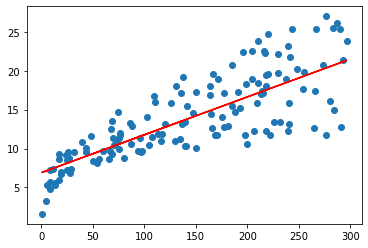

In [58]:
#Visualize the regression line - best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.8944 + 0.0487 * X_train, 'r')
plt.show()

In [59]:
#Error Analysis

y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

Text(0, 0.5, 'freq')

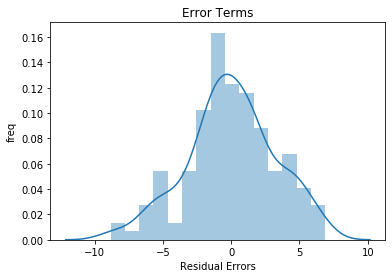

In [60]:
#PLotting the histogram of errors

sns.distplot(res, bins = 15)
plt.title('Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')

In [61]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [62]:
#Predicting
y_test_pred = lr.predict(X_test_sm)

In [63]:
res_test = (y_test - y_test_pred)

Text(0, 0.5, 'freq')

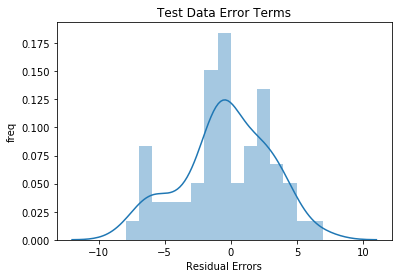

In [64]:
#PLotting the histogram of errors

sns.distplot(res_test, bins = 15)
plt.title('Test Data Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')

In [65]:
from sklearn.metrics import r2_score

r_sq = r2_score(y_test, y_test_pred)
r_sq

0.5111616978794153

In [66]:
#Regression line for Test Data

In [67]:
#Splitting the data into Train and Test (with split ratio = 80-20)

from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [68]:
X_train_lm =  X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [69]:
#Method 2
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
print(lm.intercept_)

6.745302251222065


In [72]:
print(lm.coef_)

[0.05024351]


In [73]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [74]:
print(r2_score(y_train_lm, y_train_pred))

0.6411433688483876


In [75]:
print(r2_score(y_test_lm, y_test_pred))

0.5111616978794153


In [77]:
#Assignment: Adj R2, TV, TV+Radio (R2, Adj R2, )
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = advertising[feature_cols]
y = advertising.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.04576464545539761),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762972)]

In [ ]:
#1. To see the variable importance through mix of R2 and Adj R2.
#2. To calculate the Evaluation Metrices at one place (R2, Adj R2, RMSE)